In [2]:
import numpy as np
def gradient_descent(x, y, alpha, theta, m, iterations):
    '''
    # x - independent variables in matrix format with 1's as first column
    # y - dependent variables as COLUMN vector
    # m - number of training examples
    # alpha - steps for gradient descent
    '''
    for i in range(iterations):
        '''
        give theta as a COLUMN vector. 
        TODO: check if theta is a row or column vector and make sure it is converted to column at the end
        TODO: make sure x has default 1's as the first column for the intercepts
        '''
        hypothesis = np.dot(x, theta)
        error = hypothesis - y
        gradient = np.dot(x.T, error)/m
        theta = theta - alpha*gradient
    return theta

In [3]:
import random
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n).reshape(-1,1)
y = y.reshape(-1,1)

In [4]:
final_theta = gradient_descent(x,y,alpha,theta,m,numIterations)
final_theta

array([[ 30.1442206 ],
       [  0.98997022]])

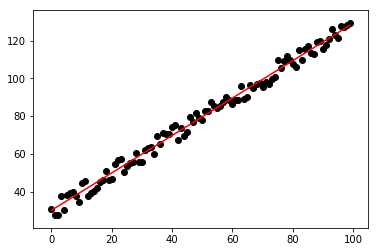

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
predictions = np.dot(x, final_theta)
plt.plot(x[:,1], predictions, color='red')  # plotting the predicted model
plt.scatter(x[:,1], y, color='black')

# TODO: learn seaborns 'lmplot' which is handy for linear regression plotting

# SOLVING COURSERA WEEK 2 ASSIGNMENT

In [6]:
import pandas as pd
df = pd.read_csv('ex1data1.txt', names = ["population", "profit"])
examples, features = np.shape(df)
print(examples, features)

97 2


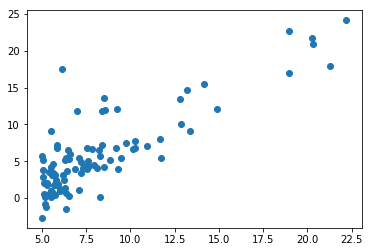

In [7]:
plt.scatter(df['population'], df['profit'])

In [8]:
x_pop = np.c_[np.ones(examples), np.array(df['population']).reshape(-1,1)] # adding 1's on the first column for population and convert to column vector
y_pro = np.array(df['profit']).reshape(-1,1)  # converting to column vector

In [9]:
new_theta = gradient_descent(x=x_pop, y=y_pro, alpha=0.0005, theta=np.ones(features).reshape(-1,1), m=examples, iterations=100000)

In [10]:
new_theta

array([[-3.89518834],
       [ 1.19297412]])

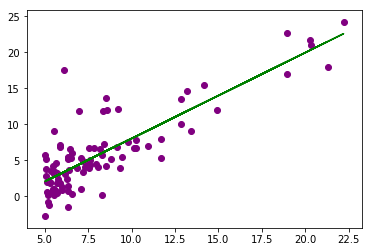

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
predict_profit = np.dot(x_pop, new_theta)
plt.plot(x_pop[:,1], predict_profit, color='green')  # plotting the predicted model
plt.scatter(x_pop[:,1], y_pro, color='purple')

In [12]:
# TODO: split as train, test data and find the precision of the model

In [13]:
ex2_df = pd.read_csv('ex1data2.txt', names=['size', 'bedroom', 'price'])
examples2, features2 = np.shape(ex2_df)
ex2_df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [14]:
x_2 = np.c_[np.ones(examples2), np.array(ex2_df[['size', 'bedroom']])]
y_2 = np.array(ex2_df['price']).reshape(-1,1)